# ASL Detection with AlexNet

# Importing Libraries and Tools

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model, Sequential
from keras.preprocessing import image
from resnets_utils import *
from keras.initializers import glorot_uniform
from matplotlib.pyplot import imshow
%matplotlib inline
import pickle
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
import os
import cv2

# Loading the Images

In [35]:
x_train = pickle.load(open("x_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))

In [36]:
x_train = x_train/255.0
x_train.shape

(11990, 64, 64, 3)

In [37]:
y_train.shape

(11990, 4)

# AlexNet for 64x64x3 Image

In [40]:
def alexnet(input_shape = (64, 64, 3), n_classes = 4):
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1),input_shape = input_shape))
    
    # Step 1 - Convolution
    model.add(Conv2D(48, (5, 5), activation = 'relu'))
    
    # Step 2 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    
    # step 3 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 4 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(192, (2, 2), activation = 'relu'))
    
    # step 5 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 6 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(192, (2, 2), activation = 'relu'))
    
    # Step 6 - Convolution
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (2, 2), activation = 'relu'))
    
    # step 7 - Pooling
    model.add(MaxPooling2D(pool_size = (2, 2)))
    
    # Step 8 - Flattening
    model.add(Flatten())
    
    # Step 14 - Full connection
    model.add(Dense(units = 1024, activation = 'relu'))
    model.add(Dropout(rate=0.40))
    
    model.add(Dense(units = 1024, activation = 'relu'))
    
    model.add(Dropout(rate=0.40))
    
    model.add(Dense(n_classes, activation = 'softmax'))
    return model

In [41]:
AlexNet = alexnet()
#Adam = Adam (lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
AlexNet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Model Training

In [42]:
history = AlexNet.fit(x_train, y_train, batch_size=32, epochs=6, 
                 validation_split=0.2)

Train on 9592 samples, validate on 2398 samples
Epoch 1/6
9592/9592 [==============================] - 419s 44ms/step - loss: 0.5509 - acc: 0.7378 - val_loss: 0.2557 - val_acc: 0.8932
Epoch 2/6
9592/9592 [==============================] - 410s 43ms/step - loss: 0.0764 - acc: 0.9746 - val_loss: 0.0524 - val_acc: 0.9783
Epoch 3/6
9592/9592 [==============================] - 410s 43ms/step - loss: 0.0353 - acc: 0.9897 - val_loss: 0.0187 - val_acc: 0.9950
Epoch 4/6
9592/9592 [==============================] - 413s 43ms/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0264 - val_acc: 0.9900
Epoch 5/6
9592/9592 [==============================] - 412s 43ms/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0153 - val_acc: 0.9971
Epoch 6/6
9592/9592 [==============================] - 424s 44ms/step - loss: 0.0234 - acc: 0.9949 - val_loss: 0.1025 - val_acc: 0.9691


# Plotting Accuracy vs Epochs

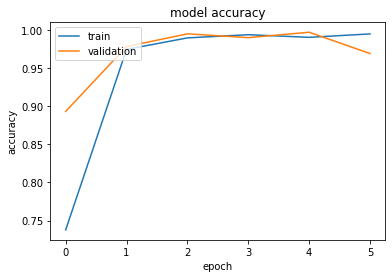

In [43]:
# Plotting Accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plotting Loss vs Epochs

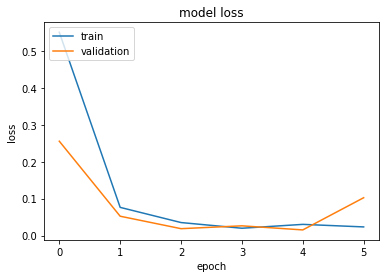

In [44]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Model Evaluation

In [45]:
DataDir_Test = "E:/asl_alphabet_test"

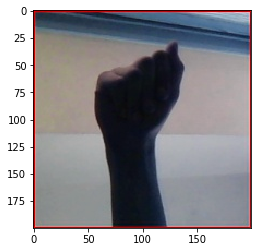

In [46]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

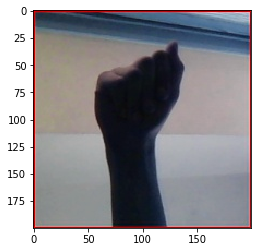

In [47]:
Categories = ["A", "B", "C", "D"]
for category in Categories:
    path = os.path.join(DataDir_Test, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        break
    break

In [48]:
test_data = []
img_size = 64
def create_test_data():
    for category in Categories:
        path = os.path.join(DataDir_Test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            test_data.append([new_array, class_num])
create_test_data()

In [49]:
x_test = []
y_test = []

for features, labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [50]:
x_test = np.asarray(x_test)
x_test = np.array(x_test).reshape(x_test.shape[0], img_size, img_size, 3)
print(x_test.shape)
y_test = np.array(y_test).reshape(-1, 1)
from keras.utils import np_utils

# One-hot encode the training labels
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(1173, 64, 64, 3)
(1173, 4)


In [51]:
x_test = x_test/255.0

# Model Accuracy

In [52]:
preds = AlexNet.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1173/1173 [==============================] - 11s 9ms/step
Loss = 0.04831531500471774
Test Accuracy = 0.9855072464276254
